# Customer segmentation of the Olist E-Commerce site

## Context
 - Olist is the largest e-commerce platform in Brazilian online marketplaces that connects and offers a solution for buying and selling on online. 
 - Olist wants to obtain a segmentation of its customers that their marketing team can use in their daily communication campaigns. 
 - The dataset provided by has information of ~100k orders from 2016 to 2018 made at multiple marketplaces. 

## Goal:
 - To understand the different types of users through their behavior and anonymized personal data.

## Objectives:
 My mission is to to help Olist teams understand the different types of users. Thus, I will use unsupervised methods to:
 - provide an actionable description of segmentation and its underlying logic for optimal use. 
 - provide an analysis of the stability of the segments over time in order to establish a maintenance contract.
 - group together customers with similar profiles that can be used by the marketing team to better communicate.

### Part 2
 - **Clustering and customer segmentation**

## 1.0 Import Libraries

In [1]:
# data manipulation and processing

import pandas as pd # for data loading, manipulation, and exploration
import numpy as np # for linear algebra/vector arithmetic
from datetime import datetime as dt # Handling dates and timestamps

# statistical data visualization
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px

# statistical analysis
import scipy.stats as st 
from scipy import stats
from scipy.stats import skew
from scipy.special import boxcox1p

# Standardization and preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Clustering algorithms 
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN

# allow plot to appear within the notebook
%matplotlib inline 

from functions import *

import warnings
warnings.filterwarnings('ignore')

## 2.0 Dataset

In [2]:
# import Client_dataset
Data_client = pd.read_csv("Client_df.csv")

# read the dataset
Data_client.head(5)

,customer_unique_id,nb_orders,Total_price,total_freight,Total_spent,review_score,purchase_year,purchase_month,Recency_days,mean_installments,payment_sequential,delivery_days,delayed_delivery,distance(km)
0,0000366f3b9a7992bf8c76cfdf3221e2,1,129.90,12.00,141.90,5.0,2018.0,5.0,115,8.0,1.0,6.0,0.0,110.60
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,18.90,8.29,27.19,4.0,2018.0,5.0,118,1.0,1.0,3.0,0.0,22.17
2,0000f46a3911fa3c0805444483337064,1,69.00,17.22,86.22,3.0,2017.0,3.0,541,8.0,1.0,25.0,0.0,517.08
3,0000f6ccb0745a6a4b88665a16c9f078,1,25.99,17.63,43.62,4.0,2017.0,10.0,325,4.0,1.0,20.0,0.0,2481.99
4,0004aac84e0df4da2b147fca70cf8255,1,180.00,16.89,196.89,5.0,2017.0,11.0,292,6.0,1.0,13.0,0.0,154.55


In [3]:
#Check summary information of the custormer's dataset
Data_client.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91035 entries, 0 to 91034
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_unique_id  91035 non-null  object 
 1   nb_orders           91035 non-null  int64  
 2   Total_price         91035 non-null  float64
 3   total_freight       91035 non-null  float64
 4   Total_spent         91035 non-null  float64
 5   review_score        91035 non-null  float64
 6   purchase_year       91035 non-null  float64
 7   purchase_month      91035 non-null  float64
 8   Recency_days        91035 non-null  int64  
 9   mean_installments   91035 non-null  float64
 10  payment_sequential  91035 non-null  float64
 11  delivery_days       91035 non-null  float64
 12  delayed_delivery    91035 non-null  float64
 13  distance(km)        91035 non-null  float64
dtypes: float64(11), int64(2), object(1)
memory usage: 9.7+ MB


In [4]:
# Check the dimension of the dataset
Data_client.shape

(91035, 14)

In [5]:
Data_client.describe()

,nb_orders,Total_price,total_freight,Total_spent,review_score,purchase_year,purchase_month,Recency_days,mean_installments,payment_sequential,delivery_days,delayed_delivery,distance(km)
count,91035.000000,91035.000000,91035.000000,91035.000000,91035.000000,91035.000000,91035.000000,91035.000000,91035.000000,91035.000000,91035.000000,91035.000000,91035.000000
mean,1.032779,148.367666,24.742795,212.380817,4.154911,2017.548511,6.037375,240.741934,2.901808,1.022655,12.050488,0.702661,602.557026
std,0.205922,244.023009,27.085892,632.450459,1.278866,0.501487,3.205117,152.643978,2.677991,0.183189,9.457706,4.574737,593.863139
min,1.000000,0.850000,0.000000,9.590000,1.000000,2016.000000,1.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,48.900000,14.100000,63.740000,4.000000,2017.000000,3.000000,117.000000,1.000000,1.000000,6.000000,0.000000,191.285000
50%,1.000000,89.900000,17.710000,112.760000,5.000000,2018.000000,6.000000,222.000000,2.000000,1.000000,10.000000,0.000000,435.610000
75%,1.000000,159.900000,26.610000,202.760000,5.000000,2018.000000,8.000000,349.000000,4.000000,1.000000,15.000000,0.000000,799.600000
max,14.000000,13440.000000,1794.960000,109312.640000,5.000000,2018.000000,12.000000,699.000000,24.000000,13.500000,208.000000,188.000000,8680.360000


## 3.0 Clustering

### 3.1 KMeans Clustering

The perfomance of K-means algorithm can be significantly affected by outliers and the distributions patterns of the variables. Hence, the following assumptions must be checked for K-means algorithm:
 - all variables should be symmetric (not skewed), i.e close to normal/gaussian distribution
 - all variables have the same average values
 - all variables have same variance/standard deviation  

### Segmentation by RFM 
 - Recency (R - number of days since last customer transaction)
 - Frequency (F - number of transactions by a customer)
 - Monetary (M - total amount spent by a customer)

### Data pre-processing

**a. Create RFM Table**

In [6]:
# create the RFM dataframe
Data_rfm = Data_client[['Recency_days', 'nb_orders', 'Total_spent']]

# rename the columns

Data_rfm.rename(columns={'nb_orders': 'Frequency', 'Total_spent': 'Monetary'}, inplace=True)
Data_rfm.head()

,Recency_days,Frequency,Monetary
0,115,1,141.90
1,118,1,27.19
2,541,1,86.22
3,325,1,43.62
4,292,1,196.89


In [7]:
Data_rfm.describe()

,Recency_days,Frequency,Monetary
count,91035.000000,91035.000000,91035.000000
mean,240.741934,1.032779,212.380817
std,152.643978,0.205922,632.450459
min,4.000000,1.000000,9.590000
25%,117.000000,1.000000,63.740000
50%,222.000000,1.000000,112.760000
75%,349.000000,1.000000,202.760000
max,699.000000,14.000000,109312.640000


**b. Check outliers**

***Quantiles***

In [8]:
def Quantiles(df, feature):
    ''' define outliers of each feature'''
    
    Q1 = df[feature].quantile(0.05)
    Q3 = df[feature].quantile(0.95)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    df_Q = df[(df[feature] >= lower_limit) & (df[feature] <= upper_limit)]
    return df_Q

# Recency outliers
Data_rfm_Q = Quantiles(Data_rfm, 'Recency_days')

# Frequency outliers
Data_rfm_Q = Quantiles(Data_rfm_Q, 'Frequency')

# Monetary outliers
Data_rfm_Q = Quantiles(Data_rfm_Q, 'Monetary')

# overall statistics of new dataframe
Data_rfm_Q.describe()

,Recency_days,Frequency,Monetary
count,87371.000000,87371.0,87371.000000
mean,241.284133,1.0,170.264462
std,152.837894,0.0,193.561550
min,4.000000,1.0,9.590000
25%,118.000000,1.0,62.435000
50%,222.000000,1.0,108.000000
75%,350.000000,1.0,191.580000
max,699.000000,1.0,1531.600000


***z-scores***

In [9]:
# check outliers
z_scores = stats.zscore(Data_rfm)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
Data_rfm_Z = Data_rfm[filtered_entries]
Data_rfm_Z.describe()

,Recency_days,Frequency,Monetary
count,87818.000000,87818.0,87818.000000
mean,241.242410,1.0,178.668111
std,152.793044,0.0,225.889084
min,4.000000,1.0,9.590000
25%,118.000000,1.0,62.650000
50%,222.000000,1.0,108.590000
75%,350.000000,1.0,193.707500
max,698.000000,1.0,2106.950000


***Boxplots***

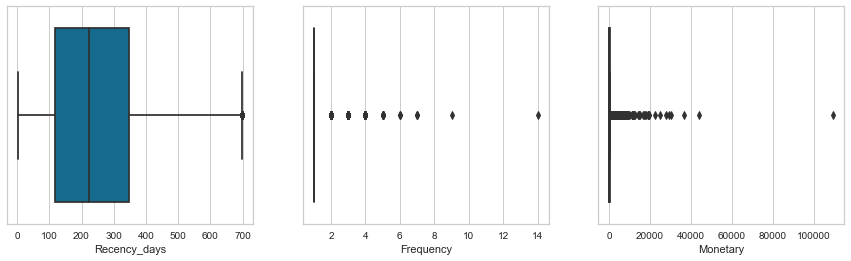

In [10]:
fig,axs=plt.subplots(1,3,figsize=(15,4))
sns.boxplot(Data_rfm['Recency_days'],ax=axs[0])
sns.boxplot(Data_rfm['Frequency'],ax=axs[1])
sns.boxplot(Data_rfm['Monetary'],ax=axs[2])
plt.show()

***Observations***:
 - The statistical and boxplots indices indicate that there are many outliers in the frequency and monetary features with only a few in the recency. However, from business point of view, these values cannot be removed because they may provide insights on customers with multiple purchases and those that spend more money in the past. 

**c. Distribution plots and skewness of RFM variables**

Generally, skewness value greater than 1 or less than -1 indicates a highly skewed distribution, values between 0.5 and 1 or -0.5 and -1 is moderately skewed, and values between -0.5 and 0.5 indicates fairly symmetrical distributions.

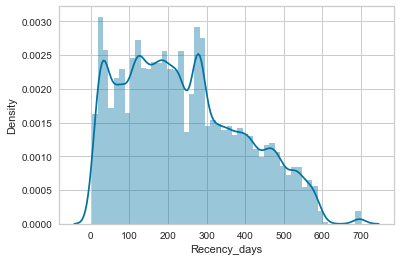

Skewness : 0.45


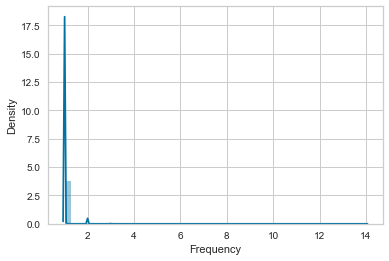

Skewness : 10.69


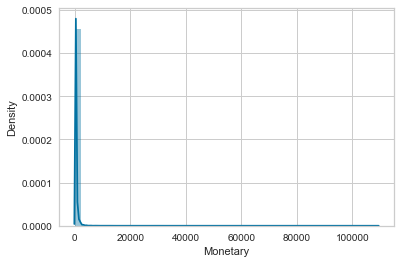

Skewness : 71.59


In [11]:
# RFM distribution plots

cols = Data_rfm.columns.tolist()

for col in cols:
    plt.figure(figsize=(6,4))
    #ax = plt.subplot(1,3, i+1)
    sns.distplot(Data_rfm[col])#, ax = ax)
    plt.xlabel(col)
    plt.show()
    skewness = Data_rfm[col].skew()
    print("Skewness : %0.2f"%skewness)  
    plt.show()

Since the distribution of the features are slightly to strongly screwed to the right, I managed their skewness with by boxcox transformation to correct either remove or reduce the skewed features.

**d. BoxCox transformations of skewed features**
 - transformed skewed (asymmetric) data close to Gaussian-normal distribution (symmetric)

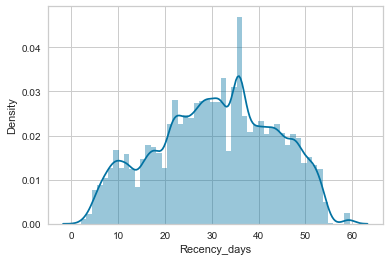

Skewness : -0.15


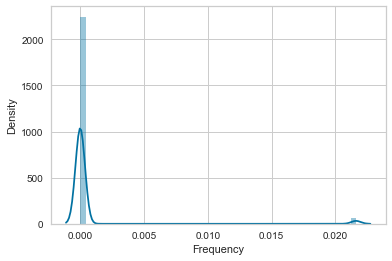

Skewness : 5.56


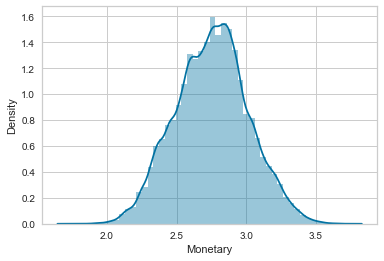

Skewness : 0.02


In [12]:
Data_Trans = Data_rfm.copy()
for i in Data_Trans.columns:
    Data_Trans[i] = stats.boxcox(Data_Trans[i])[0]
    
    # distribution plots of tranformed columns
    plt.figure(figsize=(6,4))
    sns.distplot(Data_Trans[i])
    plt.xlabel(i)
    skewness = Data_Trans[i].skew()
    plt.show()
    print("Skewness : %0.2f"%skewness) 

The skewness of frequency is slightly reduced while that of monetary and recency are removed.

Build a data processing pipeline and generate an input for unsupervised models:

**e. Choose optimal number of clusters (k)**

##### Elbow methods: distortion and calinski_harabasz metrics

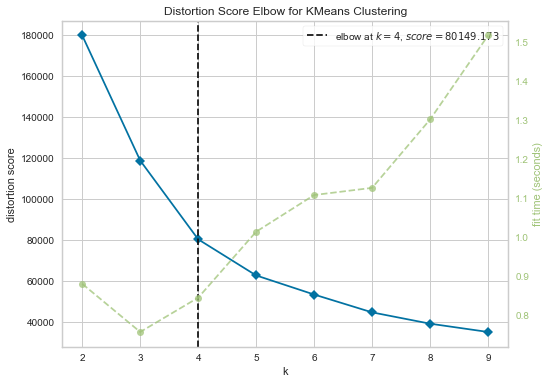

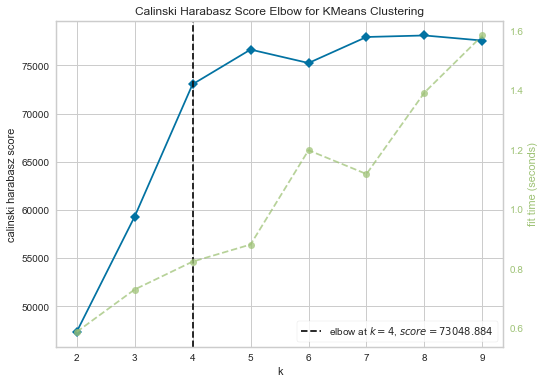

In [13]:
def Elbow_Visualizers(Data):
   
    #Standardization of variables - to  place all features within same average and variance
    numerical_features = list(Data.columns)
    preprocessor = ColumnTransformer([('scaler', StandardScaler(), numerical_features)])
    
    #Elbow method
    pipe_Elbow_CH = Pipeline([("preprocessor", preprocessor), 
                    ("kelbowvisualizer", KElbowVisualizer(KMeans(), k=(2,10), metric=m),)])
    return pipe_Elbow_CH

metrics = ["distortion", "calinski_harabasz"]
i = 0

for m in metrics:
    plt.figure(figsize=(8,6))
    M_Elbow = Elbow_Visualizers(Data_Trans)
    M_Elbow.fit(Data_Trans)
    M_Elbow.named_steps['kelbowvisualizer'].finalize()
    i+=1

plt.show()

The distortion and calinski_harabasz elbow metrics suggest an optimal of 4 clusters. Now, we plot silhouette diagrams to cross check the cluster value. 

***Silhouette visualizer***
- I use SilhouetteVisualizer to display the silhouette coefficient for each of the cluster and their average, cross check the validity of the Elbow metrics, and visualize the density and separation of the clusters. Each "blade" on the diagram represents a separate cluster. The height of blades is the number of samples inside a cluster (cluster size) and the width corresponds to the strength of inter-cluster connections. The aim is to find strongly connected clusters of near same size.

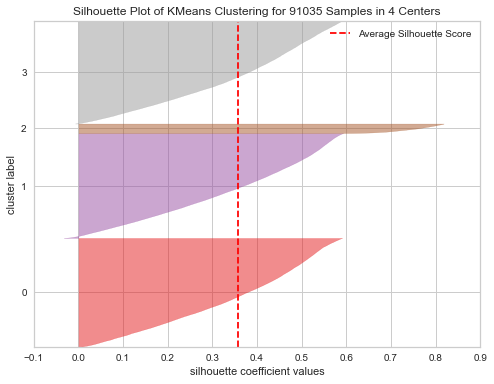

In [14]:
def Silhouette_Visualizer(Data, K):
    numerical_features = list(Data.columns)
    preprocessor = ColumnTransformer([('scaler', StandardScaler(), numerical_features)])
    
    pipe_Sil = Pipeline([("preprocessor", preprocessor), 
                         ("silhouettevisualizer", SilhouetteVisualizer(KMeans(n_clusters = K, random_state=0)))])
    return pipe_Sil

#Visualize Silhouette score at optimal k

plt.figure(figsize=(8,6))
Sil_model = Silhouette_Visualizer(Data_Trans, 4)
Sil_model.fit(Data_Trans)
Sil_model.named_steps['silhouettevisualizer'].show()
plt.show()

The 4 and 5 cluster diagrams look much similar in terms of connectivity and size. They both represent good diagrams for clustering. However, the 4 cluster diagram has a slighly higher silhouette coefficient than 5 cluster, which is consistent with the predictions of calinski_harabasz elbow metrics. Thus, I use 4 clusters for the modeling.

##### InterclusterDistance
 - check the distance between the clusters

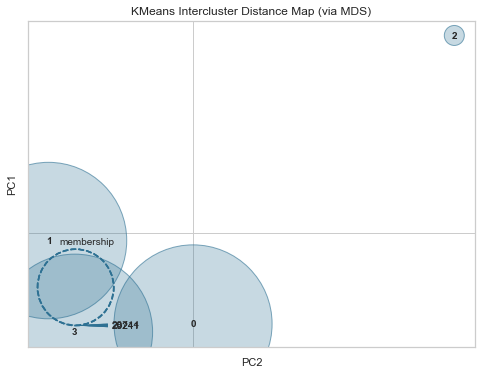

In [15]:
def Intercluster_distance(Data, K):
    numerical_features = list(Data.columns)
    preprocessor = ColumnTransformer([('scaler', StandardScaler(), numerical_features)])
    
    pipe_Dist = Pipeline([("preprocessor", preprocessor), 
                         ("distancevisualizer", InterclusterDistance(KMeans(n_clusters = K, random_state=0)))])
    return pipe_Dist

# At Best K in Elbow
plt.figure(figsize=(8,6))
k = 4
Dist_model = Intercluster_distance(Data_Trans, 4)
Dist_model.fit(Data_Trans)
Dist_model.named_steps["distancevisualizer"].show()
plt.show()

Also, the Intercluster Distance plot shows that overlapping of 3 of the clusters while one is well separated.

**f. Build the RFM KMeans Model**
 - Build a 4-cluster segmentation and extract the clusters

In [16]:
def Model_pipeline(Data, algorithm):
    numerical_features = list(Data.columns)
    preprocessor = ColumnTransformer([('scaler', StandardScaler(), numerical_features)])
    model_pipe = Pipeline([("preprocessor", preprocessor), ("model", algorithm)])
    return model_pipe

Km_model = Model_pipeline(Data_Trans, KMeans(n_clusters = 4, init='k-means++', max_iter=400))

# fit the model
Km_model.fit(Data_Trans)

# Assign k-means labels to cluster labels
cluster_labels = Km_model.predict(Data_Trans) #Km_model.named_steps["model"].labels_

# Assign cluster labels to transformed data set
Data_cluster = Data_Trans.assign(Cluster = cluster_labels)
Data_cluster.head()

,Recency_days,Frequency,Monetary,Cluster
0,21.590722,0.0,2.828487,1
1,21.914548,0.0,2.241132,0
2,51.620963,0.0,2.676371,0
3,38.914391,0.0,2.434821,0
4,36.655198,0.0,2.918562,3


***Center of the clusters***

In [17]:
Cluster_centroids = Data_cluster.groupby('Cluster').mean().reset_index()
Cluster_centroids

,Cluster,Recency_days,Frequency,Monetary
0,0,37.133061,0.000000,2.500827
1,1,16.932299,0.000000,2.763575
2,2,29.517909,0.021626,2.996296
3,3,38.318210,0.000000,2.960736


#### g. Visualize the RFM KMeans clusters

 ***2D - Scatter plots***

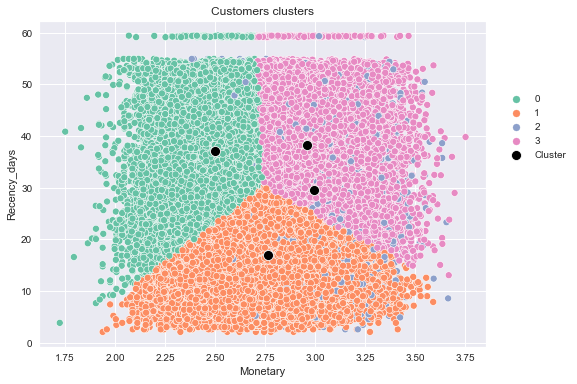

In [18]:
#Cluster = Data_rfm_cluster['Cluster'] # list(df_rfm_Kmeans['Cluster'].unique())
#Centroids
X_cent = Cluster_centroids['Monetary']
Y_cent = Cluster_centroids['Recency_days']

def cluster_plot(X, Y):
    sns.set_style('darkgrid')
    plt.figure(figsize=(8,6))
    plot = sns.scatterplot(x = X, y = Y, data = Data_cluster, hue = 'Cluster', palette = 'Set2') 
    plt.title('Customers clusters')
    return plot

# cluster plot of Monetary vs Recency
cluster_plot('Monetary', 'Recency_days')
sns.scatterplot(data = Cluster_centroids, x = X_cent, y = Y_cent, s = 100, color = 'black', label = 'Cluster')
plt.xlabel("Monetary")
plt.legend(bbox_to_anchor = (1.2,0.8))
plt.show()

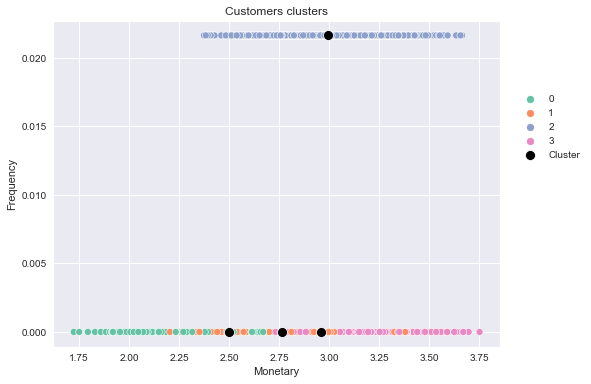

In [19]:
# cluster plot of Frequency vs Recency
cluster_plot('Monetary', 'Frequency')
sns.scatterplot(data = Cluster_centroids, x = Cluster_centroids['Monetary'], y = Cluster_centroids['Frequency'], 
                s = 100, color = 'black', label = 'Cluster')
plt.xlabel("Monetary")
plt.ylabel("Frequency")
plt.legend(bbox_to_anchor = (1.2,0.8))
plt.show()

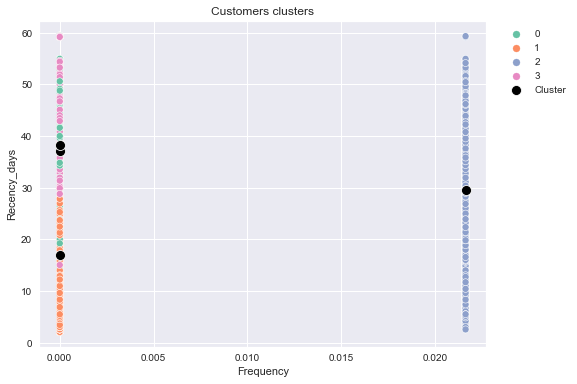

In [20]:
# cluster plot of Frequency vs Recency
cluster_plot('Frequency', 'Recency_days')
sns.scatterplot(data = Cluster_centroids, x = Cluster_centroids['Frequency'], y = Cluster_centroids['Recency_days'], 
                s = 100, color = 'black', label = 'Cluster')
plt.xlabel("Frequency")
plt.legend(bbox_to_anchor = (1.2,1))
plt.show()

The clusters are well segmented and divided on the Recency vs monetary 2D-plot

 ***3D projection***

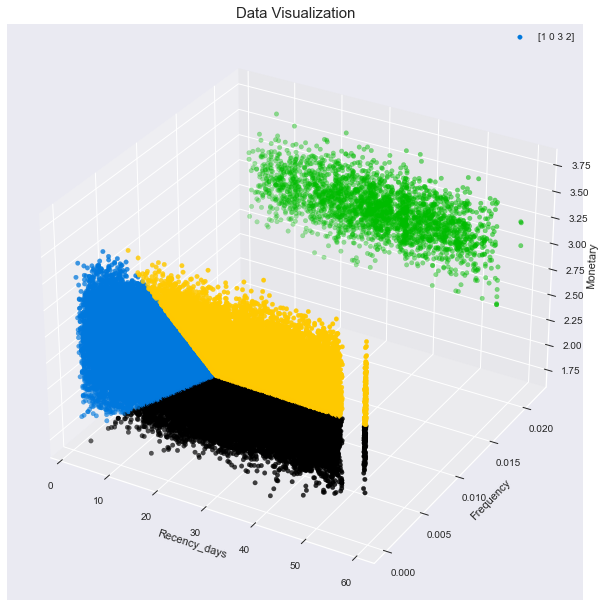

In [21]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
import matplotlib.cm as cm
import matplotlib as mpl

# fig parameters
mpl.rcParams['legend.fontsize'] = 10
fig = plt.figure(figsize=(8,8))
ax = Axes3D(fig)

# define axis data
x = Data_cluster['Recency_days']
y = Data_cluster['Frequency']
z = Data_cluster['Monetary']

# set color
colors = cm.nipy_spectral(cluster_labels.astype(float) / 4)

# set legend
label = Data_cluster['Cluster'].unique()

# plot data
ax.scatter(x, y, z, c=colors, label = label, marker='o')

# define axis labels
ax.set_xlabel('Recency_days')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.title("Data Visualization", size=15)
plt.legend(loc="upper right")
ax.legend()

plt.show()

#### h. Analyze the RFM Kmeans clusters

In [22]:
# Assign cluster labels to original pre-transformed data set
Data_rfm_Cluster = Data_rfm.assign(Cluster = cluster_labels)

# Group data set by k-means cluster
Cluster_group = Data_rfm_Cluster.groupby('Cluster').agg({'Recency_days':'mean', 'Frequency': 'mean',
                                                         'Monetary':['mean','count']}).round(0).reset_index()

Cluster_group['%_cluster'] = Cluster_group["Monetary"]["count"] *100/Cluster_group["Monetary"]["count"].sum().round(0)
Cluster_group

Cluster Recency_days Frequency Monetary         %_cluster
                  mean      mean     mean  count           
0       0        311.0       1.0     57.0  28744  31.574669
1       1         84.0       1.0    170.0  29222  32.099742
2       2        223.0       2.0    487.0   2687   2.951612
3       3        327.0       1.0    375.0  30382  33.373977

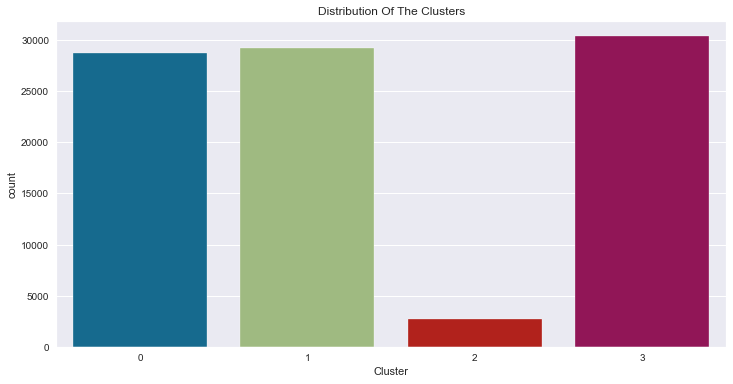

In [23]:
# Visualize distribution of the clusters
plt.figure(figsize=(12,6))
sns.countplot(Data_rfm_Cluster["Cluster"])
plt.title("Distribution Of The Clusters")
plt.show()

Cluster 1 consists the least number of customers that made more than one transactions

 - Boxplot

Frequency

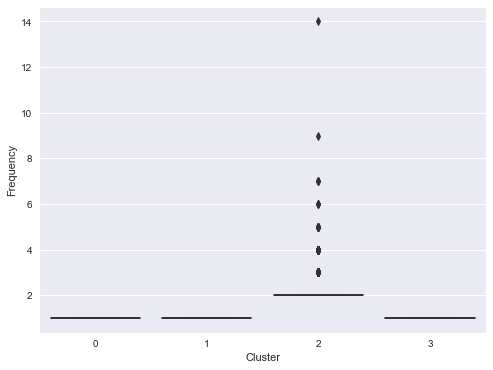

In [24]:
def box_plot(X, Y):
    plt.figure(figsize = (8,6))
    plot = sns.boxplot(x = X, y=Y, data = Data_rfm_Cluster)
    return plot

box_plot('Cluster', 'Frequency')
plt.show()    

Recency

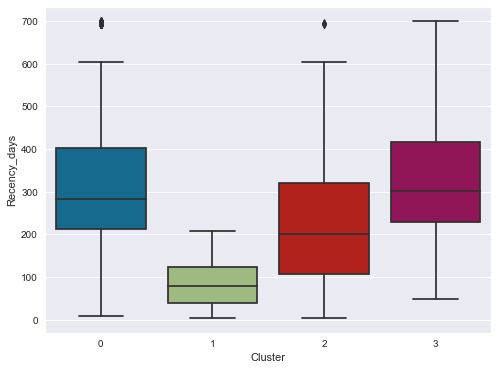

In [25]:
box_plot('Cluster', 'Recency_days')
plt.show()   

Monetary

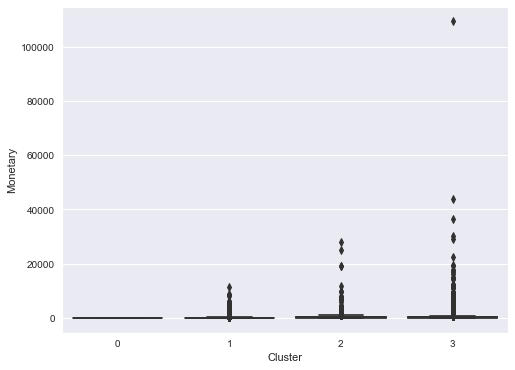

In [26]:
box_plot('Cluster', 'Monetary')
plt.show()   

In [27]:
!pip install squarify
import squarify

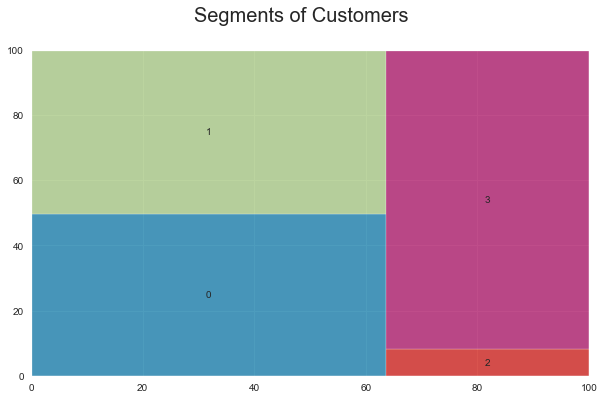

In [28]:
# Visualize Segments
plt.figure(figsize=(10, 6))
squarify.plot(sizes=Cluster_group["Monetary"]["count"], label=Cluster_group.index, color=["b","g","r","m","c", "y"], 
              alpha=0.7)
plt.suptitle("Segments of Customers", fontsize=20)
plt.show()

#### Relative Importance of the RFM features on K-Means Clusters
 - Use heatmap to visualize the relative importance of each feature for the clusters and assign each customer to their respective segments.

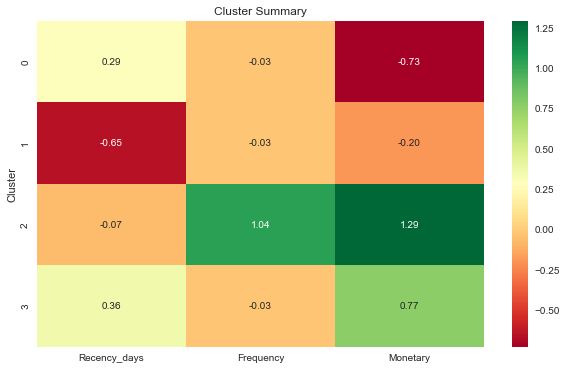

In [29]:
# Average RFM values for each cluster
Cluster_average = Data_rfm_Cluster.groupby('Cluster').mean()

# Average RFM values for the total customer population
Data_rfm_average = Data_rfm.mean()

# Relative importance of cluster's attribute value compared to population
relative_import = Cluster_average / Data_rfm_average - 1

# Visualize Relative importance of clusters on heatmap
plt.figure(figsize=(10, 6))
plt.title('Cluster Summary')
sns.heatmap(data=relative_import, annot=True, fmt='.2f', cmap='RdYlGn')
plt.show()

***Interpretations:*** 

We can see that our grouped summary of the mean of R, F, and M that each cluster of customers places a different emphasis on the 3 features:

 - ***Cluster 0*** : This group has the highest Montary mean but are one time buyers and have not shopped recently as one would expect. This is one of the most profitable segments that we need to design campaigns to activate them by making products that may keep them to spend. We must not lose them!
 

 - ***Cluster 1***: Although, this group has the least number of customers (3%), it performs well across R, F, and M. It consists regular customers with fair number of recent orders and second largest monetary value. They are the most profitable segments and ideal customers that keep the business going. They can be encouraged by offering occassional discounted prices on products that interest them.
 
 
 - ***Cluster 2***: are the least spenders with only one purchase and have not recently shopped on Olist - perhaps some personalization of products targeted at them can help to maximize their lifetime-value. Alternatively, they can be included to any kind of promotion lists or providing accumulation accounts may help to increase purchase activities.
 

 - ***Cluster 3***: has spent quite a fair amount and constitute the group of most recent one time buyers. This segment has a good potetial, so promotional deals may help to increase spendings of the segment. They are also ideal customers that must not be lost!

### Segmentation by RFM + Review Score 

In [30]:
Data_RFMS = Data_client[['Recency_days','nb_orders','Total_spent', 'review_score']]

# rename the columns
Data_RFMS.rename(columns={'Recency_days':'Recency','nb_orders': 'Frequency', 'Total_spent': 'Monetary', }, inplace=True)

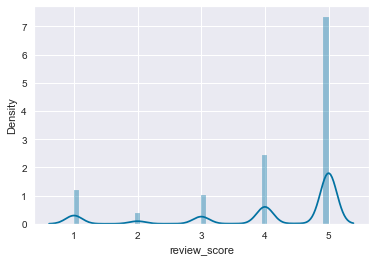

Skewness : -1.48


In [31]:
plt.figure(figsize=(6,4))
sns.distplot(Data_RFMS['review_score'])#, ax = ax)
plt.xlabel('review_score')
skewness = Data_RFMS['review_score'].skew()
plt.show()
print("Skewness : %0.2f"%skewness) 

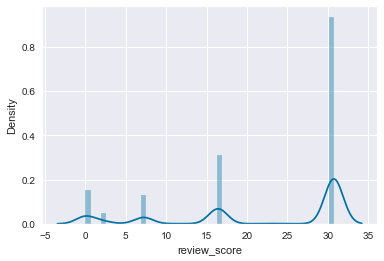

Skewness : -0.83


In [32]:
Data_RFMS_T = Data_Trans.copy()
Data_RFMS_T['review_score'] = stats.boxcox(Data_RFMS['review_score'])[0]

plt.figure(figsize=(6,4))
sns.distplot(Data_RFMS_T['review_score'])#, ax = ax)
plt.xlabel('review_score')
skewness = Data_RFMS_T['review_score'].skew()
plt.show()
print("Skewness : %0.2f"%skewness) 

***Elbow Visualizers***

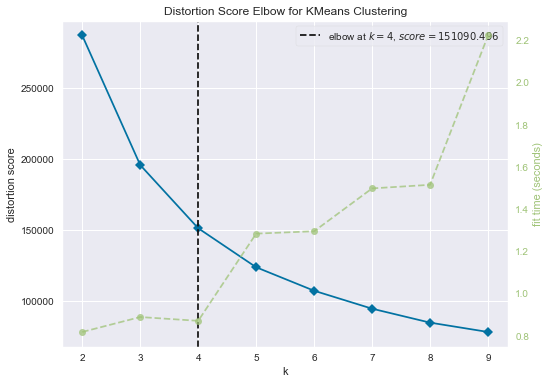

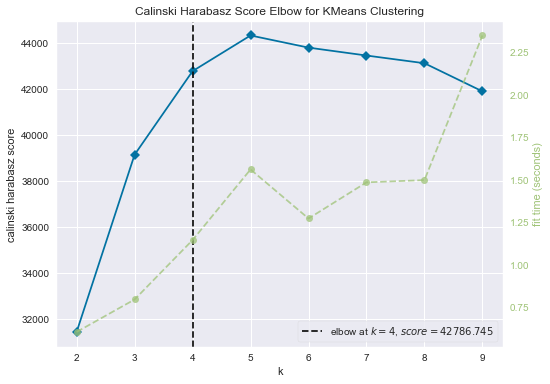

In [33]:
metrics = ["distortion", "calinski_harabasz"]
i = 0

for m in metrics:
    plt.figure(figsize=(8,6))
    M_Elbow = Elbow_Visualizers(Data_RFMS_T)
    M_Elbow.fit(Data_RFMS_T)
    M_Elbow.named_steps['kelbowvisualizer'].finalize()
    i+=1
plt.show()

***Silhouette Visualizer***

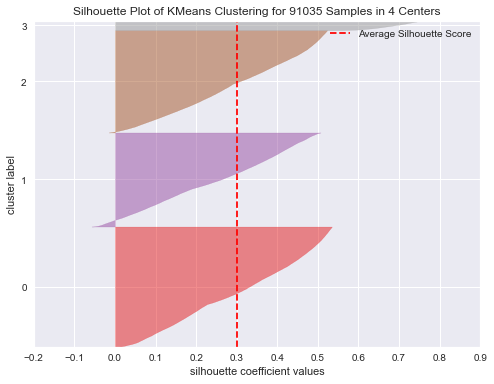

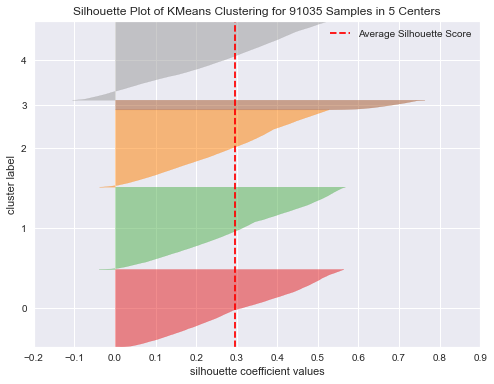

In [34]:
Cluster_range = range(4,6)
i = 0

for K in Cluster_range:
    plt.figure(figsize=(8,6))
    Sil_model = Silhouette_Visualizer(Data_RFMS_T, K)
    Sil_model.fit(Data_RFMS_T)
    Sil_model.named_steps['silhouettevisualizer'].show()
    i+=1

plt.show()

***Intercluster distance***

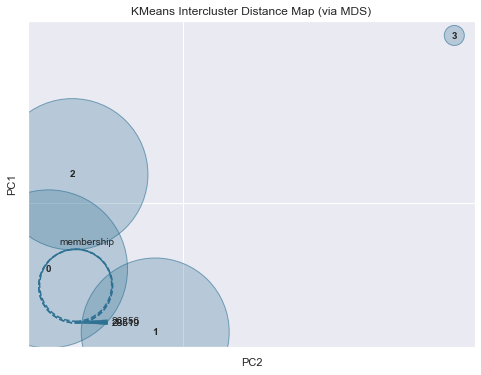

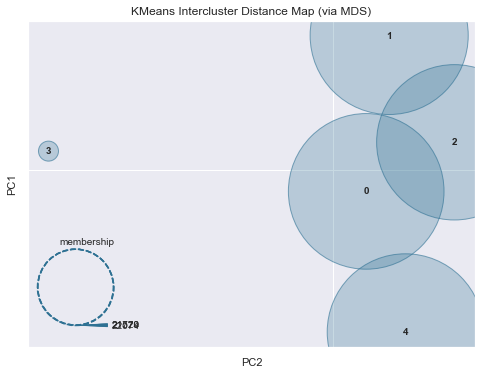

In [35]:
Cluster_range = range(4,6)
i = 0

for K in Cluster_range:
    plt.figure(figsize=(8,6))
    Dist_model = Intercluster_distance(Data_RFMS_T, K)
    Dist_model.fit(Data_RFMS_T)
    Dist_model.named_steps["distancevisualizer"].show()
    i+=1

plt.show()

Optimal K = 4

In [36]:
# KMeans
Km_RFMS = Model_pipeline(Data_RFMS_T, KMeans(n_clusters = 4, init='k-means++', max_iter=400))

# Fit the model
Km_RFMS.fit(Data_RFMS_T)

# predict the clusters
clusterer = Km_RFMS.predict(Data_RFMS_T) #Km_model["model"].labels_

# Assign cluster labels to transformed data set
Data_rfms_cluster = Data_RFMS_T.assign(Cluster = clusterer)
Data_rfms_cluster.head()

,Recency_days,Frequency,Monetary,review_score,Cluster
0,21.590722,0.0,2.828487,30.742702,3
1,21.914548,0.0,2.241132,16.408537,3
2,51.620963,0.0,2.676371,7.200890,1
3,38.914391,0.0,2.434821,16.408537,2
4,36.655198,0.0,2.918562,30.742702,2


In [37]:
# Cluster centre
Cluster_centroid_rfms = Data_rfms_cluster.groupby('Cluster').mean().reset_index()
Cluster_centroid_rfms

,Cluster,Recency_days,Frequency,Monetary,review_score
0,0,29.517909,0.021626,2.996296,21.712546
1,1,31.648164,0.000000,2.802802,7.067614
2,2,41.030905,0.000000,2.710374,28.591279
3,3,18.053410,0.000000,2.735002,28.297433


#### Visualize RFM + Review scores clusters

- 2-dimensions - dimension redcution by PCA

In [38]:
# scale data 
scaled_Data = StandardScaler().fit_transform(Data_RFMS_T) 

# reduce to 2 principal components
pca_Data = PCA(n_components=2) 

# fit and transform
PC_Data = pca_Data.fit_transform(scaled_Data) 

# creat dataframe of transformed data
PCA_df = pd.DataFrame(PC_Data, columns = ['PC1', 'PC2'])

# add clusters to dataframe
PCA_df['Cluster'] = clusterer

In [39]:
centroids = Cluster_centroid_rfms.drop('Cluster', axis = 1)
scaled_centroids = StandardScaler().fit_transform(centroids) 
reduced_centroids = pca_Data.transform(scaled_centroids)

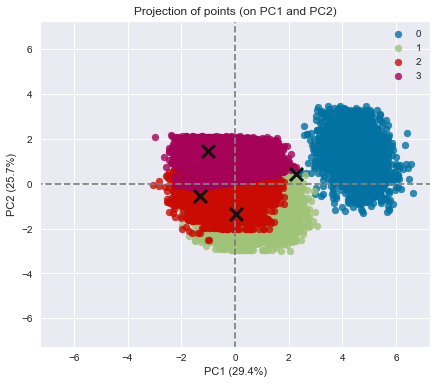

In [40]:
display_factorial_planes(PC_Data, 2, pca_Data, [(0,1)], illustrative_var = clusterer, alpha = 0.8)
plt.scatter(reduced_centroids[:, 0], reduced_centroids[:, 1], marker='x', s=169, linewidths=3, color='k', zorder=10)
plt.show()

- 3-dimensions

In [41]:
# scale data 
scaled_Data = StandardScaler().fit_transform(Data_RFMS_T) 

# reduce to 2 principal components
pca_Data = PCA(n_components=3) 

# fit and transform
PC_Data = pca_Data.fit_transform(scaled_Data) 

# creat dataframe of transformed data
PCA_df = pd.DataFrame(PC_Data, columns = ['PC1', 'PC2', 'PC3'])

# add clusters to dataframe
PCA_df['Cluster'] = clusterer

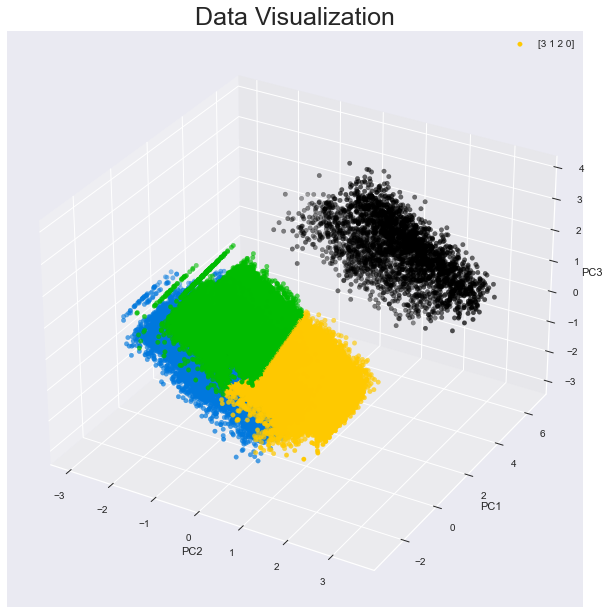

In [42]:
# fig parameters
mpl.rcParams['legend.fontsize'] = 10
fig = plt.figure(figsize=(8,8))
ax = Axes3D(fig)

# define axis data
x = PCA_df['PC2']
y = PCA_df['PC1']
z = PCA_df['PC3']

# set color
colors = cm.nipy_spectral(clusterer.astype(float) / 4)

# set legend
label = PCA_df['Cluster'].unique()

# plot data
ax.scatter(x, y, z, c=colors, label = label, marker='o')

# define axis labels
ax.set_xlabel('PC2')
ax.set_ylabel('PC1')
ax.set_zlabel('PC3')
plt.title("Data Visualization", size=25)
plt.legend(loc="upper right")
ax.legend()

plt.show()

***Distribution of the clusters***

In [43]:
# Assign cluster labels to orginal pre-transformed data set
Data_rfms_cluster_O = Data_RFMS.assign(Cluster = clusterer)
Data_rfms_cluster_O.head()

,Recency,Frequency,Monetary,review_score,Cluster
0,115,1,141.90,5.0,3
1,118,1,27.19,4.0,3
2,541,1,86.22,3.0,1
3,325,1,43.62,4.0,2
4,292,1,196.89,5.0,2


In [44]:
Cluster_group_rfms = Data_rfms_cluster_O.groupby('Cluster').agg({'Recency':'mean', 'Frequency': 'mean','Monetary':'mean', 
                                                    'review_score':['mean','count']}).round(1).reset_index()

Cluster_group_rfms['%_cluster'] = Cluster_group_rfms['review_score']["count"] *100/Cluster_group_rfms["review_score"]["count"].sum().round(0)

Cluster_group_rfms

Cluster Recency Frequency Monetary review_score         %_cluster
             mean      mean     mean         mean  count           
0       0   223.3       2.1    487.0          4.2   2687   2.951612
1       1   242.3       1.0    270.5          2.5  26401  29.000934
2       2   365.1       1.0    166.2          4.8  33617  36.927555
3       3    93.4       1.0    187.0          4.8  28330  31.119899

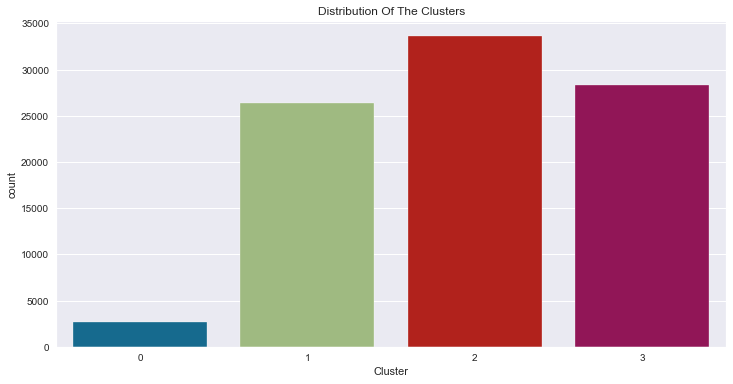

In [45]:
# Visualize distribution of the clusters
plt.figure(figsize=(12,6))
sns.countplot(Data_rfms_cluster_O["Cluster"])
plt.title("Distribution Of The Clusters")
plt.show()

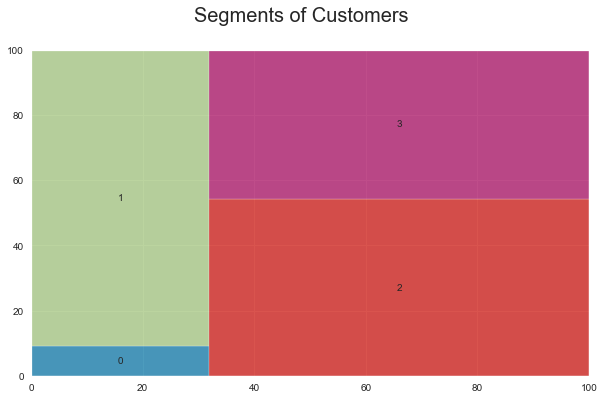

In [46]:
# Visualize Segments
plt.figure(figsize=(10, 6))
squarify.plot(sizes=Cluster_group_rfms['review_score']["count"], label=Cluster_group_rfms.index, 
              color=["b","g","r","m",], alpha=0.7)
plt.suptitle("Segments of Customers", fontsize=20)
plt.show()

***Relative importance of RFMS features on clusters***

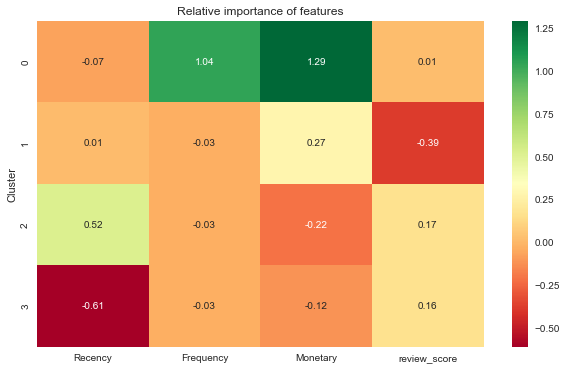

In [47]:
# Average RFM values for each cluster
Cluster_rfms_average = Data_rfms_cluster_O.groupby('Cluster').mean()

# Average RFM values for the total customer population
Data_rfms_average = Data_RFMS.mean()

# Relative importance of cluster's attribute value compared to population
relative_import =Cluster_rfms_average / Data_rfms_average - 1

# Visualize Relative importance of clusters on heatmap
plt.figure(figsize=(10, 6))
plt.title('Relative importance of features')
sns.heatmap(data=relative_import, annot=True, fmt='.2f', cmap='RdYlGn')
plt.show()

***Observation*** - 

 - Review score does not have any significant impact on the clusters and importance of each segments. 

I further explore the segmentation of the customers by adding other numerical features

### 3.1.3 RFM + other features

In [48]:
Data_client.columns

Index(['customer_unique_id', 'nb_orders', 'Total_price', 'total_freight',
       'Total_spent', 'review_score', 'purchase_year', 'purchase_month',
       'Recency_days', 'mean_installments', 'payment_sequential',
       'delivery_days', 'delayed_delivery', 'distance(km)'],
      dtype='object')

In [49]:
Data_others = Data_client[['nb_orders', 'Total_spent', 'review_score', 'Recency_days', 
                           'delivery_days', 'mean_installments', 'distance(km)']]

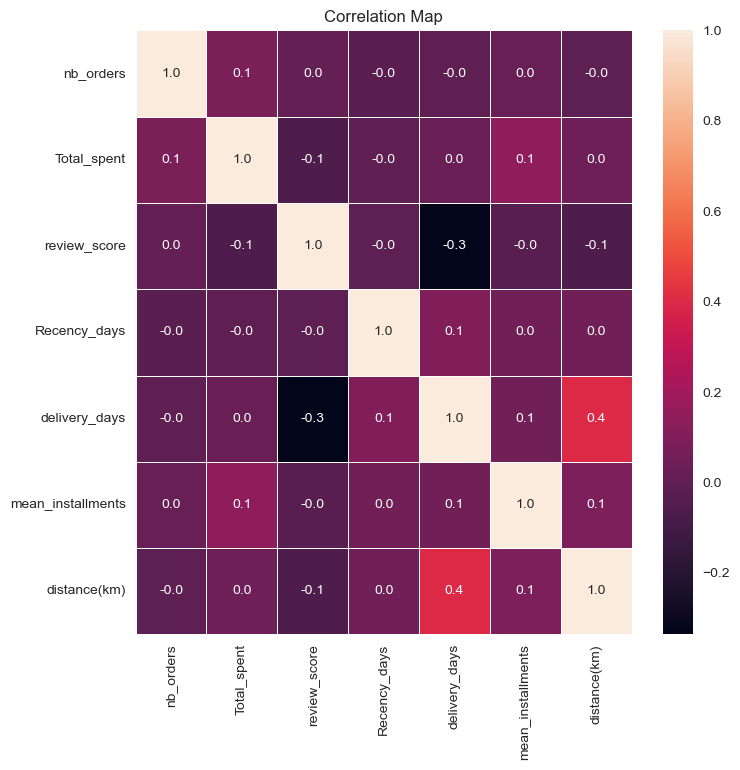

In [50]:
f, ax = plt.subplots(figsize=(8, 8), dpi = 100)
sns.heatmap(Data_others.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.title('Correlation Map')
plt.show()

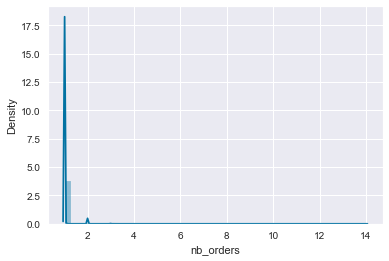

Skewness : 10.69


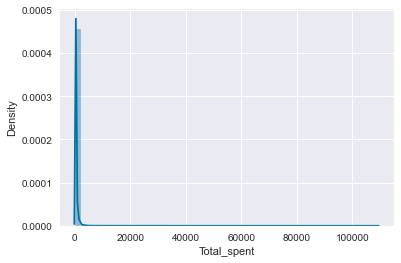

Skewness : 71.59


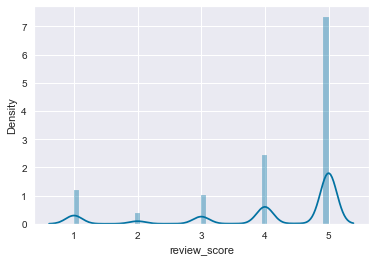

Skewness : -1.48


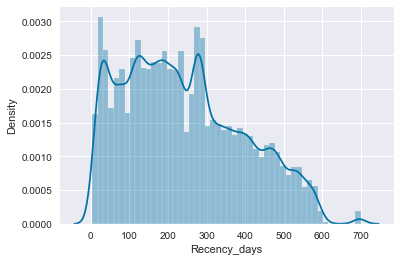

Skewness : 0.45


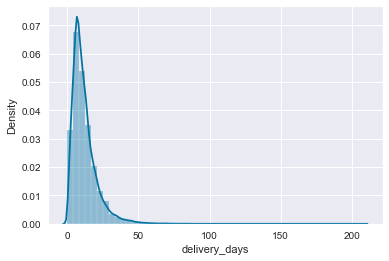

Skewness : 3.83


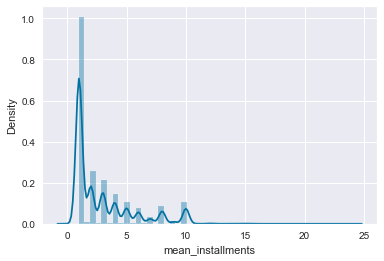

Skewness : 1.61


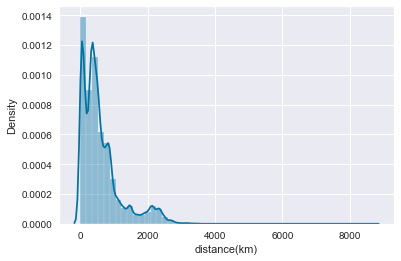

Skewness : 1.69


In [51]:
cols = Data_others.columns.tolist()

for col in cols:
    plt.figure(figsize=(6,4))
    #ax = plt.subplot(1,3, i+1)
    sns.distplot(Data_others[col])#, ax = ax)
    plt.xlabel(col)
    plt.show()
    skewness = Data_others[col].skew()
    print("Skewness : %0.2f"%skewness)  
    plt.show()

***BoxCox Feature Transformation***

In [52]:
Data_others.describe()

,nb_orders,Total_spent,review_score,Recency_days,delivery_days,mean_installments,distance(km)
count,91035.000000,91035.000000,91035.000000,91035.000000,91035.000000,91035.000000,91035.000000
mean,1.032779,212.380817,4.154911,240.741934,12.050488,2.901808,602.557026
std,0.205922,632.450459,1.278866,152.643978,9.457706,2.677991,593.863139
min,1.000000,9.590000,1.000000,4.000000,0.000000,0.000000,0.000000
25%,1.000000,63.740000,4.000000,117.000000,6.000000,1.000000,191.285000
50%,1.000000,112.760000,5.000000,222.000000,10.000000,2.000000,435.610000
75%,1.000000,202.760000,5.000000,349.000000,15.000000,4.000000,799.600000
max,14.000000,109312.640000,5.000000,699.000000,208.000000,24.000000,8680.360000


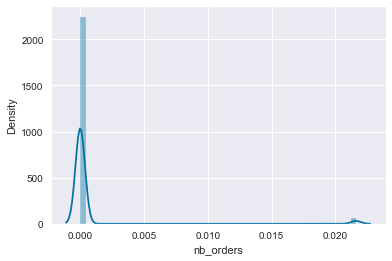

Skewness : 5.56


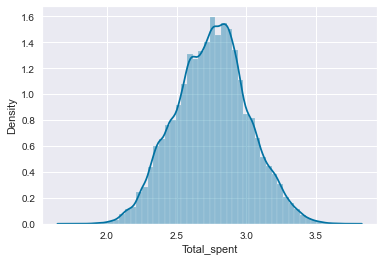

Skewness : 0.02


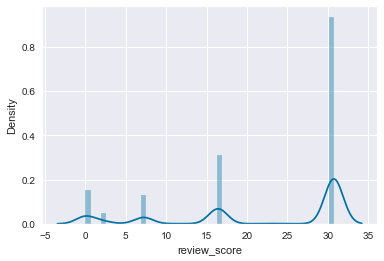

Skewness : -0.83


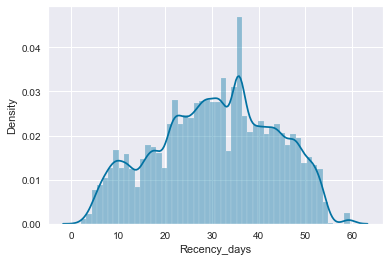

Skewness : -0.15


In [53]:
Data_Trans_others = Data_others.copy()

# features without zeros (0)
col_0 = ['nb_orders', 'Total_spent', 'review_score', 'Recency_days']#, 'payment_sequential']

for i in col_0:
    Data_Trans_others[i] = stats.boxcox(Data_Trans_others[i])[0]
    
    # distribution plots of tranformed columns
    plt.figure(figsize=(6,4))
    sns.distplot(Data_Trans_others[i])
    plt.xlabel(i)
    skewness = Data_Trans_others[i].skew()
    plt.show()
    print("Skewness : %0.2f"%skewness) 

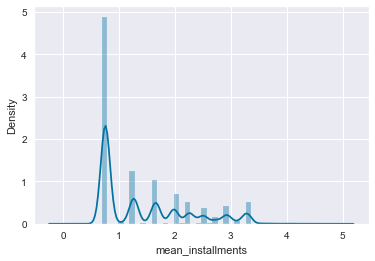

Skewness : 0.97


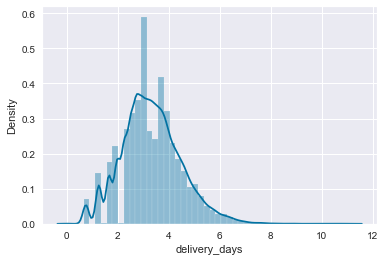

Skewness : 0.47


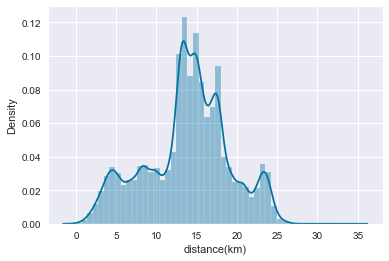

Skewness : -0.23


In [54]:
# for features with zeros (0)
col_1 = ['mean_installments', 'delivery_days', 'distance(km)']

for j in col_1:
    Data_Trans_others[j] = boxcox1p(Data_Trans_others[j], 0.25)
    
    # distribution plots of tranformed columns
    plt.figure(figsize=(6,4))
    sns.distplot(Data_Trans_others[j])
    plt.xlabel(j)
    skewness = Data_Trans_others[j].skew()
    plt.show()
    print("Skewness : %0.2f"%skewness) 

Elbow_Visualizers

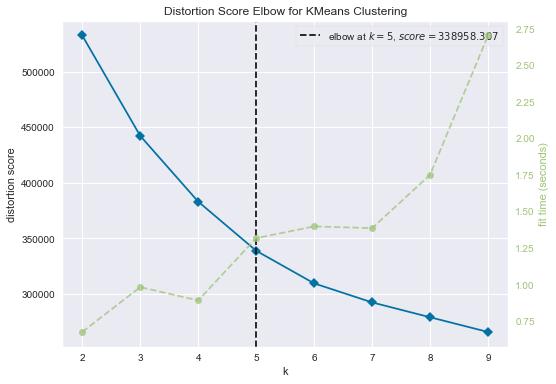

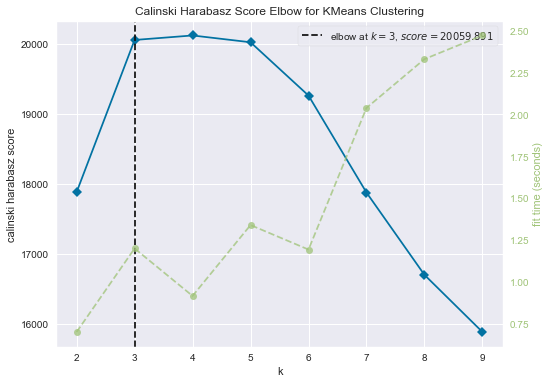

In [55]:
metrics = ["distortion", "calinski_harabasz"]
i = 0

for m in metrics:
    plt.figure(figsize=(8,6))
    M_Elbow = Elbow_Visualizers(Data_Trans_others)
    M_Elbow.fit(Data_Trans_others)
    M_Elbow.named_steps['kelbowvisualizer'].finalize()
    i+=1
plt.show()

Silhouette_Visualizer

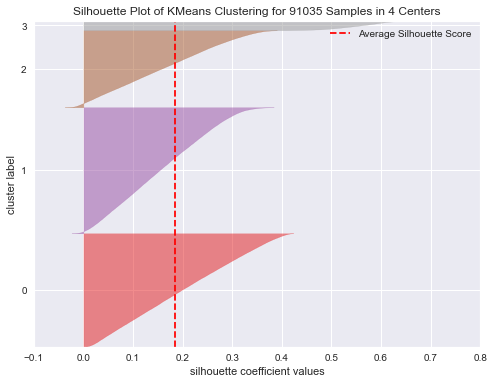

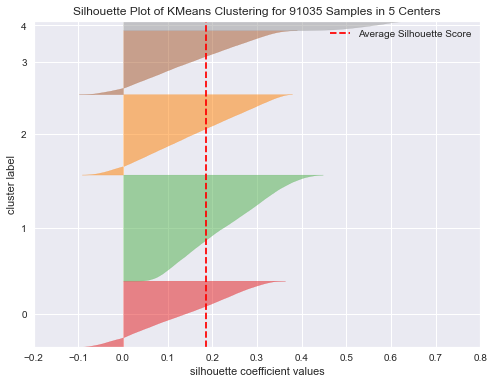

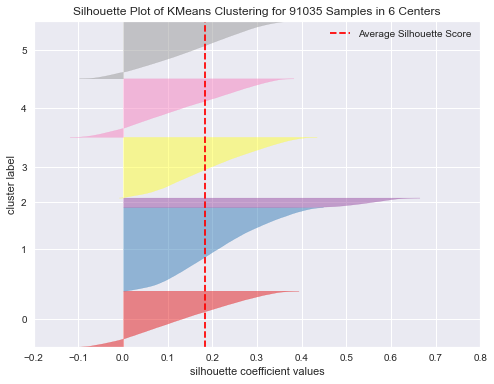

In [56]:
# Visualize silhouette of 4, 5, and 6 clusters
Cluster_range = range(4,7)
i = 0

for K in Cluster_range:
    plt.figure(figsize=(8,6))
    Sil_model = Silhouette_Visualizer(Data_Trans_others, K)
    Sil_model.fit(Data_Trans_others)
    Sil_model.named_steps['silhouettevisualizer'].show()
    i+=1

plt.show()

Intercluster_distance

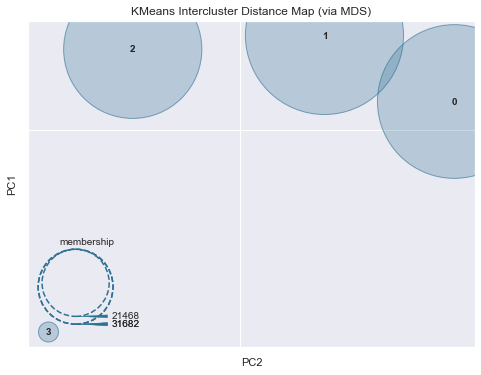

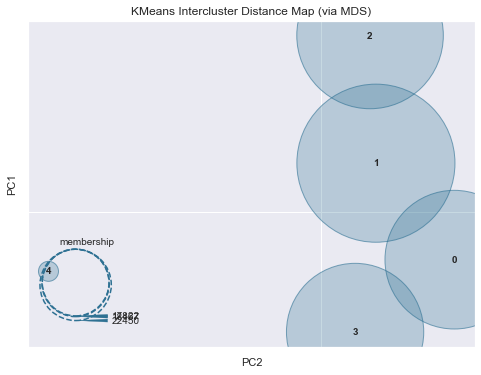

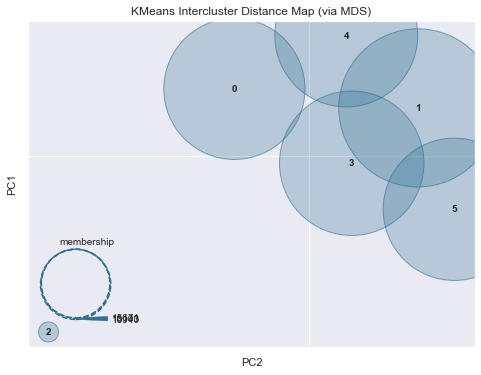

In [57]:
Cluster_range = range(4,7)
i = 0

for K in Cluster_range:
    plt.figure(figsize=(8,6))
    Dist_model = Intercluster_distance(Data_Trans_others, K)
    Dist_model.fit(Data_Trans_others)
    Dist_model.named_steps["distancevisualizer"].show()
    i+=1

plt.show()

While the distortion elbow metric suggested 5 clusters, Calinski Harabasz metric could not interpret the data. The silhoutte diagrams show that 5 and 6 clusters have similar average coefficients and it is positle to perform analysis using either of the two. I chose 5 because of its consistency with the KElbow value

***Build KMeans model with optimal cluster of K = 5***

In [58]:
# KMeans
Km_Others = Model_pipeline(Data_Trans_others, KMeans(n_clusters = 5, init='k-means++', max_iter=400))
Km_Others.fit(Data_Trans_others)

# predict the clusters
clusterer = Km_Others.predict(Data_Trans_others) #Km_model["model"].labels_

# Assign cluster labels to pre-transformed data set
Data_Others_cluster = Data_others.assign(Cluster = clusterer)
Data_Others_cluster.head()

,nb_orders,Total_spent,review_score,Recency_days,delivery_days,mean_installments,distance(km),Cluster
0,1,141.90,5.0,115,6.0,8.0,110.60,2
1,1,27.19,4.0,118,3.0,1.0,22.17,4
2,1,86.22,3.0,541,25.0,8.0,517.08,0
3,1,43.62,4.0,325,20.0,4.0,2481.99,0
4,1,196.89,5.0,292,13.0,6.0,154.55,2


***Distribution of the clusters***

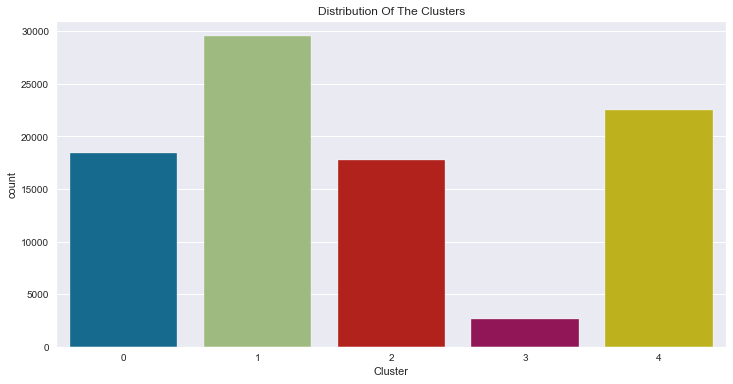

In [59]:
# Visualize distribution of the clusters
plt.figure(figsize=(12,6))
sns.countplot(Data_Others_cluster["Cluster"])
plt.title("Distribution Of The Clusters")
plt.show()

***Distribution of the clusters***

In [60]:
Cluster_Others = Data_Others_cluster.groupby('Cluster').agg({'nb_orders':'mean', 'Total_spent': 'mean',
                                                    'review_score':'mean', 'Recency_days':'mean', 
                                                    'delivery_days':'mean', 'mean_installments':'mean',                             
                                                    'distance(km)':['mean','count']}).round(1).reset_index()

Cluster_Others['%_cluster'] = Cluster_Others['distance(km)']["count"] *100/Cluster_Others["distance(km)"]["count"].sum().round(0)

Cluster_Others

Cluster nb_orders Total_spent review_score Recency_days delivery_days  \
               mean        mean         mean         mean          mean   
0       0       1.0       235.3          2.4        249.0          20.6   
1       1       1.0       136.3          4.9        288.9          12.5   
2       2       1.0       404.0          4.4        247.4          11.2   
3       3       2.1       487.0          4.2        223.3          11.8   
4       4       1.0       109.2          4.5        167.6           5.2   

  mean_installments distance(km)         %_cluster  
               mean         mean  count             
0               2.3        833.9  18473  20.292195  
1               1.6        762.9  29539  32.447960  
2               7.0        679.8  17804  19.557313  
3               3.3        556.2   2687   2.951612  
4               1.8        147.2  22532  24.750920

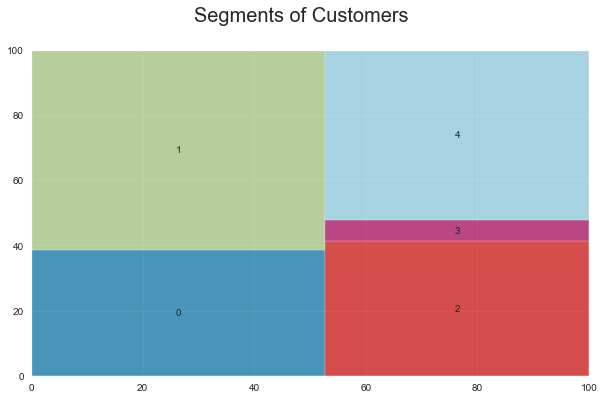

In [61]:
# Visualize Segments
plt.figure(figsize=(10, 6))
squarify.plot(sizes=Cluster_Others['distance(km)']["count"], label=Cluster_Others.index, 
              color=["b","g","r","m","c", "y"], alpha=0.7)
plt.suptitle("Segments of Customers", fontsize=20)
plt.show()

***Relative importance of RFMS features on clusters***

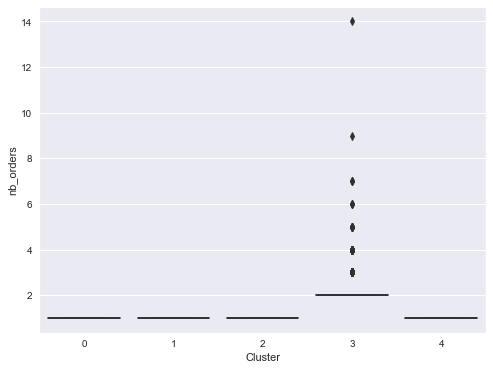

In [62]:
def box_plot(X, Y):
    plt.figure(figsize = (8,6))
    plot = sns.boxplot(x = X, y=Y, data = Data_Others_cluster)
    return plot

box_plot('Cluster', 'nb_orders')
plt.show()    

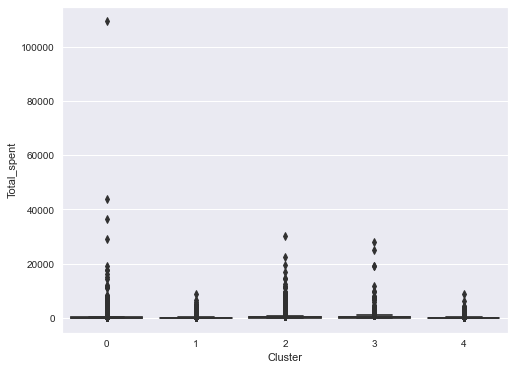

In [63]:
box_plot('Cluster', 'Total_spent')
plt.show()    

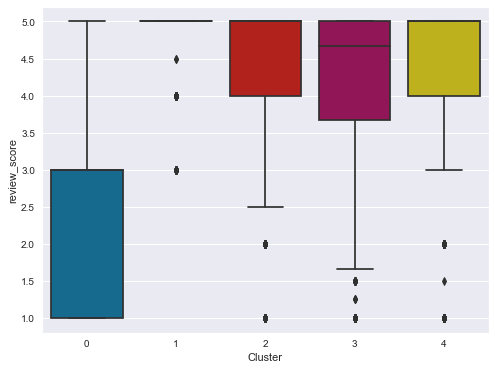

In [64]:
box_plot('Cluster', 'review_score')
plt.show()  

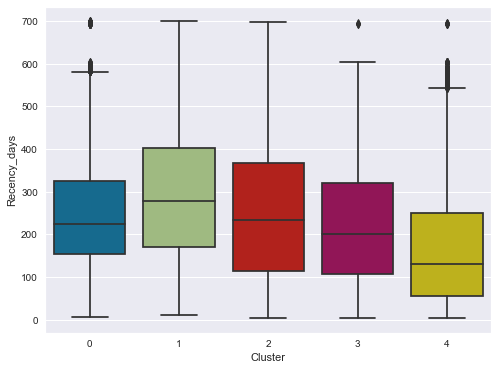

In [65]:
box_plot('Cluster', 'Recency_days')
plt.show()  

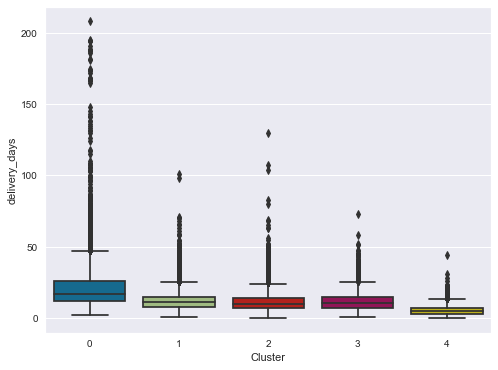

In [66]:
box_plot('Cluster', 'delivery_days')
plt.show()

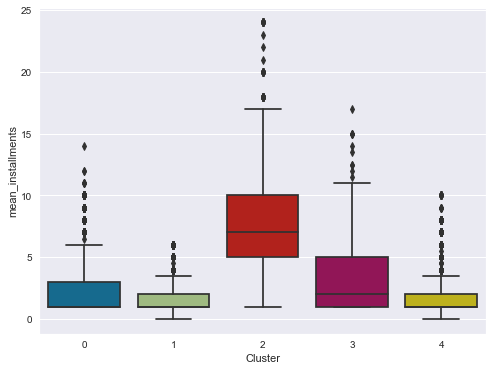

In [67]:
box_plot('Cluster', 'mean_installments')
plt.show()

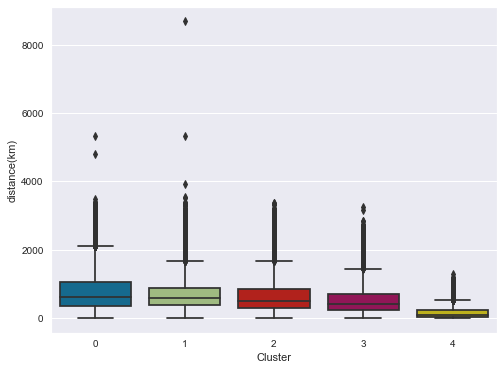

In [68]:
box_plot('Cluster', 'distance(km)')
plt.show()

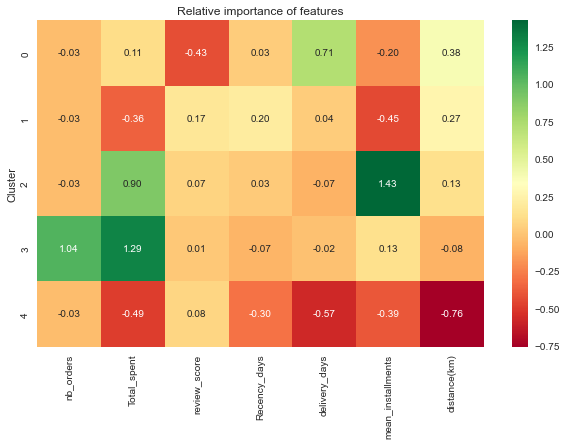

In [69]:
# Average RFM values for each cluster
Cluster_Others_average = Data_Others_cluster.groupby('Cluster').mean()

# Average RFM values for the total customer population
Data_Others_average = Data_others.mean()

# Relative importance of cluster's attribute value compared to population
relative_import =Cluster_Others_average / Data_Others_average - 1

# Visualize Relative importance of clusters on heatmap
plt.figure(figsize=(10, 6))
plt.title('Relative importance of features')
sns.heatmap(data=relative_import, annot=True, fmt='.2f', cmap='RdYlGn')
plt.show()

***Interpretations:*** 

We can see that our grouped summary of the mean of R, F, and M that each cluster of customers places a different emphasis on the features:

 - Cluster 0: This group has a fair monetary mean but is a one-time buyer and has not shopped recently as one would expect. They made payments in installments and are one of the most profitable segments. 

 - Cluster 1: They make one-time payments with excellent review scores and a low number of installments. They are not frequent and regular shoppers

 - Cluster 2: They mostly pay once for small amounts. These customers are not far away from their sellers and the delivery times are short. The opinions of these customers are very good, and they constitute the most recent customers.

- Cluster 3: Although this group has the least number of customers (3%), it performs well across the features. They made orders more than once with customers with a fair number of recent orders and good monetary value. They are the most profitable segments and ideal customers that keep the business going. The reviews from these customers are also very good.

- Cluster 4: These are dissatisfied customers with bad review scores probably due to long delivery periods and high shipping costs are very long and the shipping costs high because of the geographical distance. However, these are the customers who spent the most.

### 3.2 Agglomerative and DBSCAN Clusterings

The dataset is considerably large for Agglomerative and DBScan clustering (~91000 observations). I will use only randomly selected 20 % of the feature RFM dataset using the train-test-split method. Unlike KMeans, I did not tranform the features for Agglomeratice and Dbsan clusterings because they can both detect outliers and skewed data

### 3.2 Agglomerative Clustering

### 3.2.1 RFM

In [70]:
# Select 20% of the dataset

Data_agglo = Data_rfm.copy()

#Split the data into 80/20 ratio
Data_80, Data_AC,  = train_test_split(Data_agglo,  test_size=0.2, random_state=0)

# Check statistical summary of selected 20%
Data_AC.describe()

,Recency_days,Frequency,Monetary
count,18207.000000,18207.000000,18207.000000
mean,240.384577,1.030702,211.270088
std,151.991928,0.191526,534.964509
min,4.000000,1.000000,11.630000
25%,118.000000,1.000000,64.505000
50%,221.000000,1.000000,113.330000
75%,348.000000,1.000000,206.845000
max,699.000000,7.000000,36489.240000


***Number of clusters***

In [71]:
def Model_Agglomerative(Data, K):
    '''agglomerative model in pipeline and pca reduction'''
    numerical_features = list(Data.columns)
    preprocessor = ColumnTransformer([('scaler', StandardScaler(), numerical_features)])
    model_pipe = Pipeline([("preprocessor", preprocessor), ("pca", PCA(n_components=2)), 
                           ("model", AgglomerativeClustering(n_clusters = K, affinity='euclidean', linkage='ward'))])
    return model_pipe

def scale_data(Data):
    '''function for scaling data'''
    numerical_features = list(Data.columns)
    preprocessor = ColumnTransformer([('scaler', StandardScaler(), numerical_features)])
    Data_scaled = preprocessor.fit_transform(Data)
    return Data_scaled

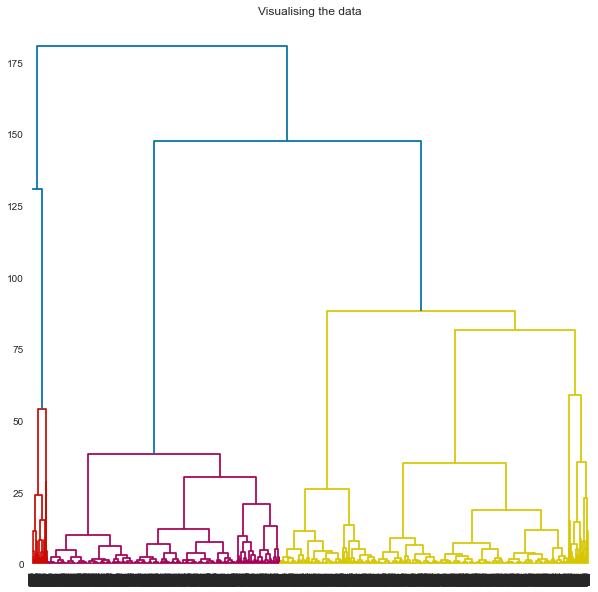

In [72]:
# Scale and reduce the dimensionality of the dataset
Scaled_data = scale_data(Data_AC)
pca = PCA(2)
pc_data = pca.fit_transform(Scaled_data)
scale_data_df = pd.DataFrame(pc_data, columns = ['P1', 'P2'])

# Build and Visualize the dendrogram

linkage_data = linkage(Scaled_data, method='ward', metric='euclidean')

plt.figure(figsize =(10, 10))
dendrogram(linkage_data)
plt.title('Visualising the data')
plt.show()

The dendrogram showed an optimal cluster of 3 

In [73]:
# silhouette_scores
Cluster_range = range(2,5)
i = 0

silhouette_scores = []

for K in Cluster_range:
    #plt.figure(figsize=(8,6))
    Ag_model = Model_Agglomerative(Data_AC, K)
    #Ag_model.fit(Data_AC)
    Ag_pred = Ag_model.fit_predict(Data_AC)
    score = silhouette_score(Data_AC, Ag_pred)
    silhouette_scores.append(score)
    i+=1
Silhouette_scores_df = pd.DataFrame(silhouette_scores, columns = ['Silhoutte_Score'], index = list(Cluster_range))

In [74]:
Silhouette_scores_df.index.name = 'n_cluster' 
Silhouette_scores_df = Silhouette_scores_df.reset_index()
Silhouette_scores_df

,n_cluster,Silhoutte_Score
0,2,0.667336
1,3,0.303656
2,4,0.203267


The Silhouette_scores shows that the optimal n_cluster for the RFM data is 2

Build and visualize the model for 2, 3 and 4 clusters

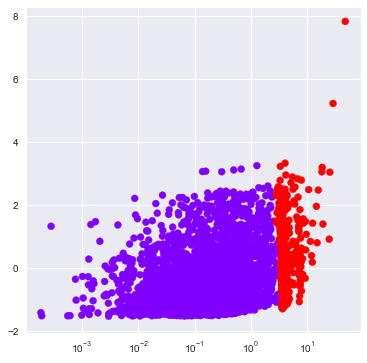

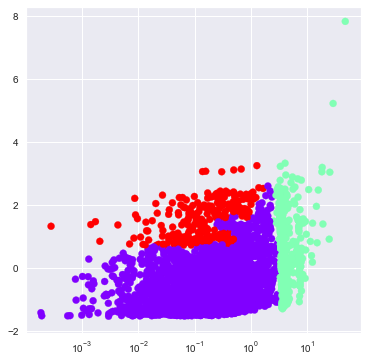

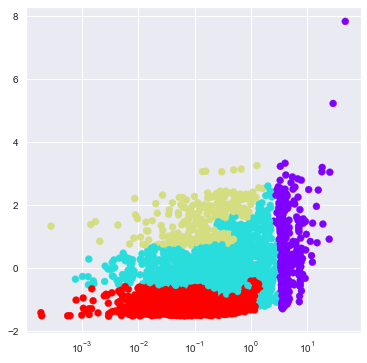

In [75]:
#Visualize the 2, 3, and 4 cluster models

Cluster_range = range(2,5)
i = 0

for K in Cluster_range:
    #Get the clusters
    hierarchical_cluster = Model_Agglomerative(Data_AC, K)
    #hierarchical_cluster.fit(Data_AC)
    labels = hierarchical_cluster.fit_predict(Data_AC)
    data_label = scale_data_df.assign(Cluster = labels)

    # Visualizing the clustering
    plt.figure(figsize =(6, 6))
    plt.scatter(data_label['P1'], data_label['P2'], c = labels, cmap ='rainbow')
    plt.xscale('log')
    plt.show()
    i+=1

### 3.2.2 RFM + Others

In [76]:
Data_O = Data_others.copy()

#Split the data into 80/20 ratio
Data_RFMO, Data_80,  = train_test_split(Data_O,  test_size=0.8, random_state=0)

# Check statistical summary of selected 20%
Data_RFMO.describe()

,nb_orders,Total_spent,review_score,Recency_days,delivery_days,mean_installments,distance(km)
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000
mean,1.032570,211.942006,4.159057,240.408634,12.055448,2.918201,599.439564
std,0.206412,471.759563,1.269016,152.820221,9.557910,2.706744,591.733805
min,1.000000,10.890000,1.000000,4.000000,0.000000,1.000000,0.000000
25%,1.000000,64.000000,4.000000,117.000000,6.000000,1.000000,190.175000
50%,1.000000,113.550000,5.000000,222.000000,10.000000,2.000000,433.800000
75%,1.000000,200.830000,5.000000,349.000000,15.000000,4.000000,794.547500
max,7.000000,19342.260000,5.000000,699.000000,208.000000,24.000000,3544.880000


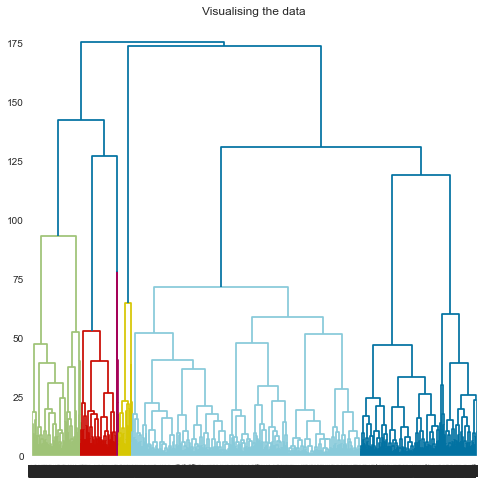

In [77]:
Scaled_data_RFMO = scale_data(Data_RFMO)
pc_data_RFMO = pca.fit_transform(Scaled_data_RFMO)
RFMO_data_df = pd.DataFrame(pc_data_RFMO, columns = ['P1', 'P2'])

linkage_data = linkage(Scaled_data_RFMO, method='ward', metric='euclidean')
plt.figure(figsize =(8, 8))
dendrogram(linkage_data)
plt.title('Visualising the data')
plt.show()

The dendrogram suggested 5 clusters

In [78]:
Cluster_range = range(2,6)
i = 0

silhouette_scores = []

for K in Cluster_range:
    #plt.figure(figsize=(8,6))
    Ag_RFMO = Model_Agglomerative(Data_RFMO, K)
    #Ag_RFMO.fit(Data_RFMO) 
    Ag_pred = Ag_RFMO.fit_predict(Data_RFMO)
    score = silhouette_score(Data_RFMO, Ag_pred)
    silhouette_scores.append(score)
    i+=1
Silhouette_scores_df = pd.DataFrame(silhouette_scores, columns = ['Silhoutte_Score'], index = list(Cluster_range))

In [79]:
Silhouette_scores_df.index.name = 'n_cluster' 
Silhouette_scores_df = Silhouette_scores_df.reset_index()
Silhouette_scores_df

,n_cluster,Silhoutte_Score
0,2,0.266241
1,3,0.187477
2,4,0.141263
3,5,0.100636


Build and visualize clusters

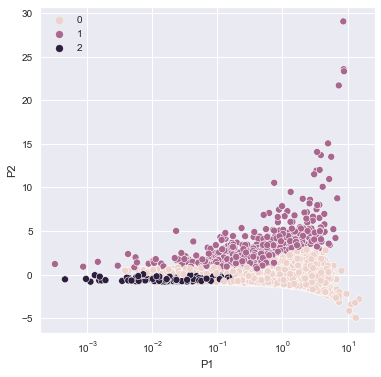

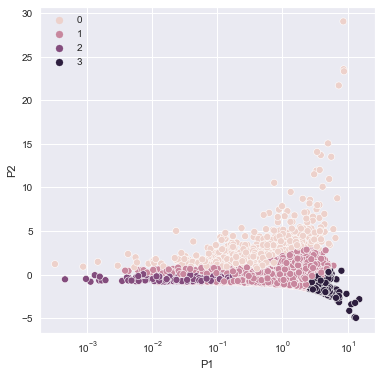

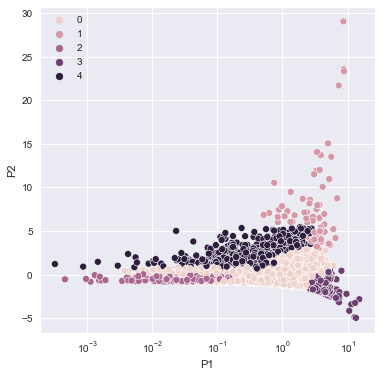

In [80]:
Cluster_range = range(3,6)
i = 0

for K in Cluster_range:
    #Get the clusters
    hierarchical_cluster = Model_Agglomerative(Data_RFMO, K)
    #hierarchical_cluster.fit(Data_RFMO)
    labels = hierarchical_cluster.fit_predict(Data_RFMO)
    data_label = RFMO_data_df.assign(Cluster = labels)

    # Visualizing the clustering
    plt.figure(figsize =(6, 6))
    sns.scatterplot(data_label['P1'], data_label['P2'], hue = labels, c = labels, cmap ='rainbow')
    plt.xscale('log')
    plt.legend()
    plt.show()
    i+=1

### 3.3 DBSCAN

### 3.3.1 RFM

In [81]:
DB_rfm = Data_AC.copy()

In [82]:
# scale data
Scaled_DM_rfm = scale_data(DB_rfm)
pca = PCA(2)
pc_data = pca.fit_transform(Scaled_DM_rfm)
pc_DB_rfm = pd.DataFrame(pc_data, columns = ['P1', 'P2'])

In [83]:
def Model_DBSCAN(Data):
    '''dbscan model in pipeline and pca reduction'''
    numerical_features = list(Data.columns)
    preprocessor = ColumnTransformer([('scaler', StandardScaler(), numerical_features)])
    model_pipe = Pipeline([("preprocessor", preprocessor), ("model", DBSCAN(eps = 1, min_samples = 30))])
    return model_pipe

Build and visualize cluster model

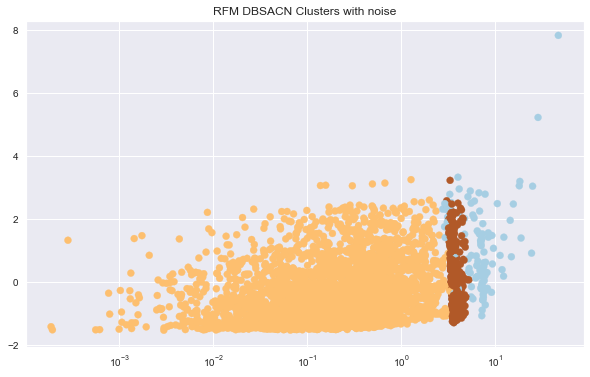

Estimated number of clusters: 2
Estimated number of noise points: 112


In [84]:
labels_true = DB_rfm.index

Db_model = Model_DBSCAN(DB_rfm)
#Db_model.fit(DB_rfm)
labels = Db_model.fit_predict(DB_rfm)
DB_data_label = pc_DB_rfm.assign(Cluster = labels)

# Visualize clusters
plt.figure(figsize=(10,6))
plt.scatter(DB_data_label['P1'], DB_data_label['P2'],c=labels, cmap='Paired')
plt.title("RFM DBSACN Clusters with noise")
plt.xscale('log')
plt.show()

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Remove the noise

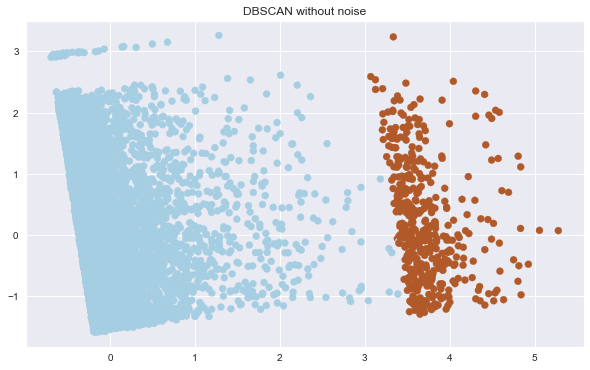

In [85]:
#filter the noise points
filtered_noise = DB_data_label[DB_data_label['Cluster'] > -1]
labels = filtered_noise['Cluster']

# Visualize clusters
plt.figure(figsize=(10,6))
plt.scatter(filtered_noise['P1'], filtered_noise['P2'],c=labels, cmap='Paired')
plt.title("DBSCAN without noise")
#plt.xscale('log')
plt.show()

### 3.3.2 RFM + Others

In [86]:
Db_others = Data_RFMO.copy()
Db_others.shape

(18207, 7)

In [87]:
# scale data
Db_Others_Scaled = scale_data(Db_others)
pca = PCA(2)
pc_data = pca.fit_transform(Db_Others_Scaled)
Db_Others_pc = pd.DataFrame(pc_data, columns = ['P1', 'P2'])

Build and visualize cluster model

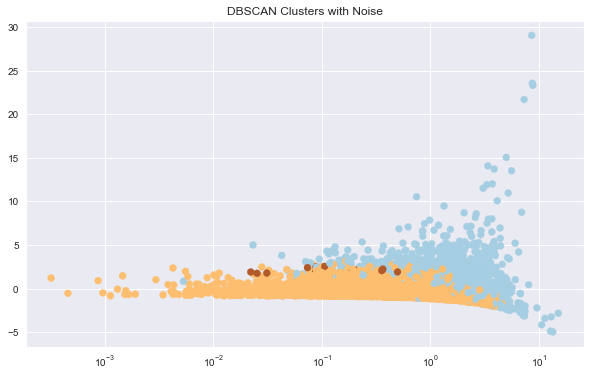

Estimated number of clusters: 2
Estimated number of noise points: 1598


In [88]:
labels_true = Db_others.index

Db_model = Model_DBSCAN(Db_others)
#Db_model.fit(Db_others)
labels = Db_model.fit_predict(Db_others)
DB_data_label = Db_Others_pc.assign(Cluster = labels)

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

# Visualize clusters
plt.figure(figsize=(10,6))
plt.scatter(DB_data_label['P1'], DB_data_label['P2'],c=labels, cmap='Paired')
plt.title("DBSCAN Clusters with Noise")
plt.xscale('log')
plt.show()


print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Remove the noise

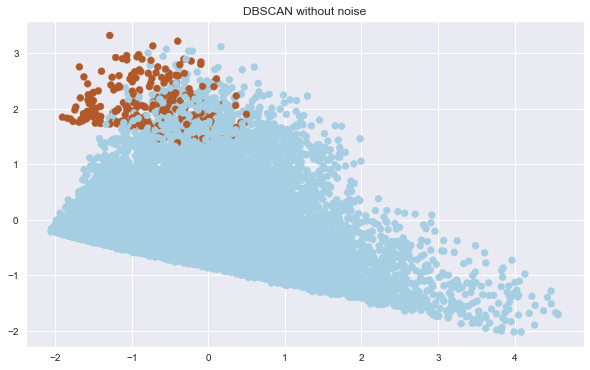

Estimated number of clusters: 2
Estimated number of noise points: 0


In [89]:
#filter the noise points
filtered_noise = DB_data_label[DB_data_label['Cluster'] > -1]
labels = filtered_noise['Cluster']

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)


# Visualize clusters
plt.figure(figsize=(10,6))
plt.scatter(filtered_noise['P1'], filtered_noise['P2'],c=labels, cmap='Paired')
plt.title("DBSCAN without noise")
#plt.xscale('log')
plt.show()

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

## 3.4 Conclusion of Customer segementation and clustering

The clients' datasets have been successfully segmented by K-means and hierarchial agglomerative clusterings into 5 optimal clusters despite minor imperfections. However, DBSCAN didn't perform well and only suggests 3 clusters with noise and 2 without noise. This is because DBSCAN is density based and it is unable to discriminate weakly represented clusters. Based on their metric scores, K-means performed better and it's prefered for the clustering modeling.The customers are better segmented using several variables than the tradional RFM method. 